# YOUR NAME HERE: Yuyang Zhang

# A5 Convolutional Neural Network (Total 150pts)


## 1. Import libraries (Total 6pts)

### 1.1 Import torch, torchvision, torchvision.transforms, torch.utils.data and torch.nn (6pts)

In [ ]:
# TODO
import torch
import torchvision
import torchvision.transforms as transforms
import torch.utils.data as data
import torch.nn as nn

## 2. Data Preparation (Total 32pts)


### 2.1 Image Transformation (12pts)
Define a transformation pipeline using torchvision.transforms.Compose.

In the pipeline, use **ColorJitter, GaussianBlur, RandomHorizontalFlip, ToTensor and Normalize** from the transforms library.

For the first four transformations, use suitable parameters of your informed choice. At the end, normalize the images with mean 0.5 and variance 0.5.

Read about these transformations here: https://pytorch.org/vision/0.9/transforms.html

In [ ]:
# TODO
transform = transforms.Compose([
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
    transforms.GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 2.0)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

### 2.2 Prepare train and test set by loading CIFAR10 dataset from torchvision.datasets. (4pts)
Make sure you are using the **transform** pipeline (you just wrote in task #2.1) on both train and test set. 

**Hint:** Preparing train and test sets can be directly achieved by utilizing the class parameters.


Read about CIFAR10 dataset class in PyTorch: https://pytorch.org/vision/0.9/datasets.html#cifar

In [ ]:
# TODO
train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


### 2.3 Use torch.utils.data.random_split() to make a validation set from the training set with 80:20 split. (3pts)

Make sure the training set you'll use after this point excludes the validation set of images 


In [ ]:
# TODO
train_size = int(0.8 * len(train_set))
val_size = len(train_set) - train_size

train_set, val_set = torch.utils.data.random_split(train_set, [train_size, val_size])

### 2.4 Prepare three dataloaders for train, validation and test set. Use an appropriate batchsize of your choice. (1+2+2+2 =7pts)


**Hints:**
1. Remember that choosing a batchsize is always a trade-off between efficiency and generalizability. With large batchsize, your model learns more and better in each forward pass, but each pass will require larger computation. On the other hand, with small batchsize, it might converge quicker, but each forward pass teaches features from a smaller subset, which may not be a good representation of the overall data; leading to jittery convergence.
2. During training, you will use the train and validation set for tracking the loss and avoiding overfitting. The test set will be hold out until you are ready to evaluate a trained model on new data. 

Read about pytorch Dataloaders here:
https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#preparing-your-data-for-training-with-dataloaders

In [ ]:
# TODO: set a batch size
batch_size = 64

# TODO: write dataloader for train set
train_loader = data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

# TODO: write dataloader for test set
val_loader = data.DataLoader(val_set, batch_size=batch_size, shuffle=False)

# TODO: write dataloader for validation set
test_loader = data.DataLoader(test_set, batch_size=batch_size, shuffle=False)


### 2.5 Load a random batch of images from the training set using the trainloader. Then use *make_grid()*  from *torchvision.utils* and *imshow()* from *matplotlib.pyplot* to show the images. Also, print the corresponding true labels for those image samples. (6pts)
Hint: you may need to reshape the *make_grid()* output to comply with the format *imshow()* accepts.

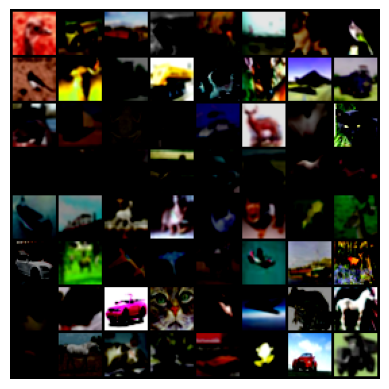

tensor([2, 9, 8, 0, 4, 0, 5, 2, 2, 4, 9, 9, 5, 4, 0, 9, 7, 9, 6, 3, 8, 4, 3, 3,
        4, 1, 3, 2, 1, 1, 7, 0, 8, 8, 7, 3, 3, 5, 4, 4, 1, 4, 0, 0, 7, 0, 8, 4,
        6, 5, 1, 3, 2, 0, 6, 7, 4, 7, 3, 2, 1, 6, 1, 9])


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# TODO: load a random batch of test set images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# TODO: show the images
img_grid = torchvision.utils.make_grid(images)
img_np = np.transpose(img_grid.numpy(), (1, 2, 0))
plt.imshow(img_np)
plt.axis('off')
plt.show()

# TODO: print the ground truth class labels for these images
print(labels)

## 3. Model Design (Total 22pts)

### 3.1 Define a neural network model: (2+7+7 =16pts)
- Name the model class with your first name
- In the following sequential order, the model should consist:

    (1) a 2D convolution layer with 6 filters, dimension of each filter is (5, 5), stride=1, no zero padding
    
    (2) a Max Pool layer with filter size (2, 2), stride=2
    
    (3) a 2D convolution layer with 16 filters, dimension of each filter is (5, 5), stride=1, no zero padding

    (4) a 2D Max Pool layer with filter size (2, 2), stride=2
    
    ~ a flatten layer ~

    (5) a Dense/Fully-connected layer with 120 neurons
    
    ~ a ReLU activation ~
    
    ~ a Dropout Layer ~

    (6) a Dense/Fully-connected layer with 80 neurons
    
    ~ a ReLU activation ~

    (7) a Dense/Fully-connected layer with 10 neurons

Note: 
1. Flatten, ReLU and Dropout are not really "layers". They are operations with specific purpose. But in model construction in pytorch, they are abstracted as layers.
    
    Flatten is used to convert the 4th layer output to a 1D tensor so that it can be passed through the next fully-connected layer. Since each forward pass takes a batch of data, use the *start_dim* parameter of *torch.flatten()* appropriately to keep the batch dimension intact.
    
    ReLU is an activation that transforms the Dense Layer's linear output to a non-linear "active" output.
    
    Dropout is a regularization technique. Read more in slides. In this assignment, you can drop neurons with 50% probability. 

2. This dataset has 10 classes, hence the final layer consists 10 neurons. 

3. The model architecture is similar to the one you saw in in-class Quiz 2, with an extra dense layer in the end. 

    Read about building your custom model in pytorch here: https://pytorch.org/tutorials/beginner/introyt/modelsyt_tutorial.html

    The official pytorch documentation on conv, flatten, rely, dense are also resourceful.


In [ ]:
class Yuyang(nn.Module):
  def __init__(self):
    # TODO: Initialize the layers
    super(Yuyang, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool1 = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.pool2 = nn.MaxPool2d(2, 2)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.relu1 = nn.ReLU()
    self.dropout = nn.Dropout(p=0.5)
    self.fc2 = nn.Linear(120, 80)
    self.relu2 = nn.ReLU()
    self.fc3 = nn.Linear(80, 10)

  def forward(self, x):
    # TODO: Define the dataflow through the layers
    x = self.pool1(self.relu1(self.conv1(x)))
    x = self.pool2(self.relu1(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = self.relu1(self.fc1(x))
    x = self.dropout(x)
    x = self.relu2(self.fc2(x))
    x = self.fc3(x)
    return x

### 3.2 Create an instance of the model class that you just prepared. (2pts)

In [ ]:
# TODO:
model = Yuyang()

### 3.3 Set up Cross Entropy Loss as the loss function and *Adam* as the optimizer. Use a learning rate of your choice for the optimizer. (4pts) 


In [ ]:
# TODO: Define the loss function and optimizer
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## 4. Training and Validation (Total 50pts)


### 4.1 Write a training loop to load data, compute model output, compute loss and backpropagating it to update model parameters. (30pts)

The # TODO tags below contain further instructions. 

In [ ]:
# TODO: Define number of epochs
num_epochs = 30

# TODO: Initialize empty lists to store training loss, training accuracy, validation loss, validation accuracy 
# You will use these lists to plot the loss history.
train_loss_history = []
train_acc_history = []
val_loss_history = []
val_acc_history = []

# TODO: Loop through the number of epochs
for epoch in range(num_epochs):
  # TODO: set model to train mode
  model.train()
  running_loss = 0.0
  correct_predictions = 0
  # TODO: iterate over the training data in batches
  for i, data in enumerate(train_loader):
        
    # TODO: get the image inputs and labels from current batch
    inputs, labels = data
        
    # TODO: set the optimizer gradients to zero to avoid accumulation of gradients
    optimizer.zero_grad()

    # TODO: compute the output of the model
    outputs = model(inputs)

    # TODO: compute the loss on current batch
    loss = criterion(outputs, labels)
        
    # TODO: backpropagate the loss
    loss.backward()

    # TODO: update the optimizer parameters
    optimizer.step()

    # TODO: update the train loss and accuracy
    running_loss += loss.item()
    _, predicted = torch.max(outputs.data, 1)
    correct_predictions += (predicted == labels).sum().item()

  # TODO: compute the average training loss and accuracy and store in respective arrays
  train_loss = running_loss / len(train_loader)
  train_acc = correct_predictions / len(train_set)
  train_loss_history.append(train_loss)
  train_acc_history.append(train_acc)

  # TODO: set the model to evaluation mode
  model.eval()

  # TODO: keeping the gradient computation turned off, loop over batches of data from validation set.
  with torch.no_grad():
    running_loss = 0.0
    correct_predictions = 0
    for i, data in enumerate(val_loader):
      inputs, labels = data
      # TODO: compute output of the model
      outputs = model(inputs)

      # TODO: compute the loss
      loss = criterion(outputs, labels)

      # TODO: compute the number of correct predictions
      _, predicted = torch.max(outputs.data, 1)
      correct_predictions += (predicted == labels).sum().item() 

      # TODO: update the validation loss
      running_loss += loss.item()

  # TODO: compute the average validation loss and accuracy and store in respective lists
  val_loss = running_loss / len(val_loader)
  val_acc = correct_predictions / len(val_set)
  val_loss_history.append(val_loss)
  val_acc_history.append(val_acc)

  # TODO: print the training loss, training accuracy, validation loss and validation accuracy at the end of each epoch
  print('Epoch [{}/{}], Train Loss: {:.4f}, Train Acc: {:.4f}, Val Loss: {:.4f}, Val Acc: {:.4f}'.format(epoch+1, num_epochs, train_loss, train_acc, val_loss, val_acc))

  # TODO: save the best model parameters
  best_val_acc = 0;
  if val_acc > best_val_acc:
    best_val_acc = val_acc
    torch.save(model.state_dict(), 'best_model.ckpt')
    

Epoch [1/30], Train Loss: 1.8934, Train Acc: 0.2987, Val Loss: 1.6482, Val Acc: 0.4029
Epoch [2/30], Train Loss: 1.6466, Train Acc: 0.4011, Val Loss: 1.5281, Val Acc: 0.4476
Epoch [3/30], Train Loss: 1.5576, Train Acc: 0.4351, Val Loss: 1.4744, Val Acc: 0.4685
Epoch [4/30], Train Loss: 1.5043, Train Acc: 0.4551, Val Loss: 1.4436, Val Acc: 0.4815
Epoch [5/30], Train Loss: 1.4676, Train Acc: 0.4702, Val Loss: 1.3944, Val Acc: 0.5004
Epoch [6/30], Train Loss: 1.4440, Train Acc: 0.4807, Val Loss: 1.4159, Val Acc: 0.4892
Epoch [7/30], Train Loss: 1.4094, Train Acc: 0.4938, Val Loss: 1.3500, Val Acc: 0.5179
Epoch [8/30], Train Loss: 1.3938, Train Acc: 0.5006, Val Loss: 1.3084, Val Acc: 0.5323
Epoch [9/30], Train Loss: 1.3678, Train Acc: 0.5079, Val Loss: 1.3028, Val Acc: 0.5346
Epoch [10/30], Train Loss: 1.3580, Train Acc: 0.5114, Val Loss: 1.2996, Val Acc: 0.5308
Epoch [11/30], Train Loss: 1.3443, Train Acc: 0.5157, Val Loss: 1.3489, Val Acc: 0.5223
Epoch [12/30], Train Loss: 1.3356, Train 

### 4.2 Plot and compare (5+5 =10pts)
1. training and validation loss over the number of epochs
2. training and validation accuracy over the number of epochs

(Hint: Use plot() from *matplotlib.pyplot*, import it if you haven't already done so.)

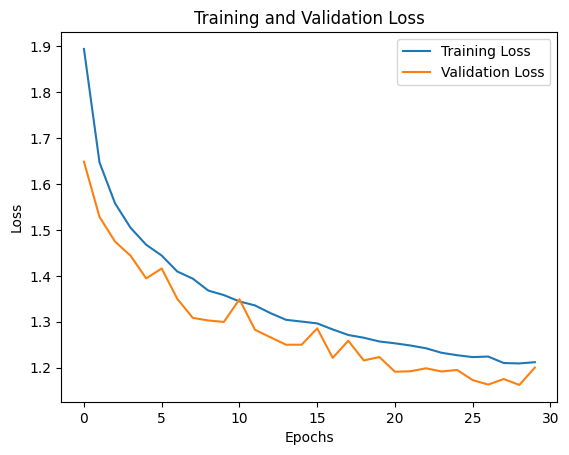

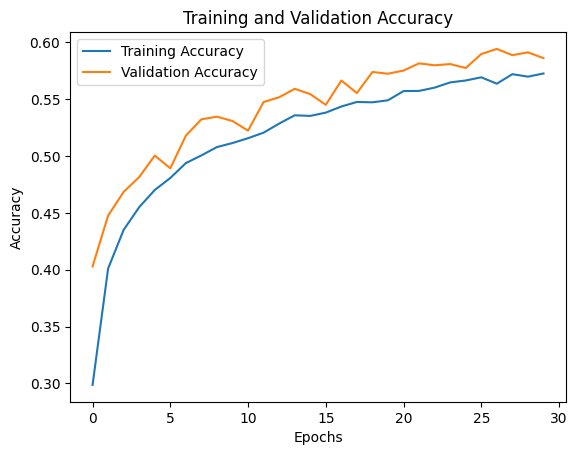

In [135]:
import matplotlib.pyplot as plt

# TODO: plot the training and validation loss
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# TODO: plot the training and validation accuracy
plt.plot(train_acc_history, label='Training Accuracy')
plt.plot(val_acc_history, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

### 4.3 Discussion: (2*5 = 10pts)
(1) Does the training loss and accuracy improve as number of epoch increases?

Yes. The training loss has been reduced from the original 1.90 to 1.25. And the Training accuracy increased from the initial 0.30 to 0.56.

(2) Does the validation loss and accuracy improve as number of epoch increases?

Yes. The validation loss has been reduced from the original 1.65 to 1.24. And the validation accuracy increased from the initial 0.40 to 0.58.

(3) Are there any sign of overfitting in the results? If so, when did it start to occur?

No. Neither the accuracy nor the loss image obviously found that the two lines gradually became farther away. Which means following two conditions didn't happen:

The training accuracy continues to improve while the validation accuracy plateaus.

The validation loss starts to increase, while the training loss continues to decrease.

(4) How many epochs did it take for the model to converge to a good solution?

30 epoches

(5) What enhancement can be tried to the architecture to further improve the validation performance?

Increase the depth and/or width of the network.

Use different activation functions.

Use batch normalization.


~ # TODO

## 5. Testing on new data (Total 40pts)


### 5.1 Load the best performing model (one with good validation accuracy and without overfitting) among the ones you saved. (4pts)

In [136]:
# TODO: instantiate a model
model = Yuyang()

# TODO: load parameters from one of the saved model states
model.load_state_dict(torch.load('best_model.ckpt'))

# TODO: set this model to evaluation mode 
model.eval()


Yuyang(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (relu1): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=120, out_features=80, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=80, out_features=10, bias=True)
)

### 5.2 Take a random batch of images from test set and show the images. Print the corresponding ground truth class labels. Then compute model output (model selected at previous step) and the predicted labels for the images in this batch. (10pts)

This is similar to task #2.5 with additional task on computing model output and printing predicted labels.

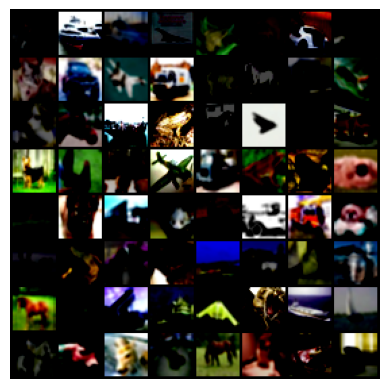

tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9,
        5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9,
        7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3])
tensor([3, 8, 1, 0, 6, 6, 0, 4, 3, 1, 0, 9, 6, 7, 9, 1, 5, 9, 8, 6, 9, 0, 0, 9,
        4, 6, 4, 0, 9, 6, 6, 4, 2, 5, 9, 8, 4, 1, 9, 5, 8, 4, 7, 6, 0, 9, 3, 9,
        7, 6, 1, 8, 5, 6, 8, 8, 5, 8, 4, 3, 7, 3, 1, 1])


In [137]:
import matplotlib.pyplot as plt
# TODO: load a random batch of test set images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# TODO: show the images
img_grid = torchvision.utils.make_grid(images)
img_np = np.transpose(img_grid.numpy(), (1, 2, 0))
plt.imshow(img_np)
plt.axis('off')
plt.show()

# TODO: print the ground truth class labels for these images
print(labels)

# TODO: compute model output
outputs = model(images)

_, predicted = torch.max(outputs, 1)

# TODO: print the predicted class labels for these images
print(predicted)

### 5.3 Compute the average accuracy on test data using this model. (4+2 =6pts)
Loop over the test set, compute accuracy on each batch, lastly print the average accuracy. 

In [138]:
# TODO: compute accuracy on each batch of test set
model.eval()
total_correct = 0
total_images = 0
with torch.no_grad():
  for data in test_loader:
    images, labels = data
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total_images += labels.size(0)
    total_correct += (predicted == labels).sum().item()

avg_accuracy = 100 * total_correct / total_images

# TODO: print the average accuracy
print('Average Accuracy on Test Set: {:.2f}%'.format(avg_accuracy))

Average Accuracy on Test Set: 58.66%


### 5.4 Compute the average accuracy for each individual class. (8+4 =12pts)
Hint: similar to #5.3. During each loop, log the accuracy for each class separately (a python/numpy dictionary can help). Then print the individual accuracy for the 10 output classes. 

In [139]:
# TODO: compute per-class accuracy on each batch of test set
model.eval()
class_correct = np.zeros(10)
class_total = np.zeros(10)

with torch.no_grad():
  for images, labels in test_loader:
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == labels).squeeze()

    for i in range(len(labels)):
      label = labels[i].item()
      class_correct[label] += correct[i].item()
      class_total[label] += 1

# TODO: print per-class accuracy for 10 output classes
for i in range(10):
  accuracy = 100 * class_correct[i] / class_total[i]
  print('Accuracy of class {} : {:.2f}%'.format(i, accuracy))

Accuracy of class 0 : 60.70%
Accuracy of class 1 : 74.10%
Accuracy of class 2 : 45.10%
Accuracy of class 3 : 30.00%
Accuracy of class 4 : 53.60%
Accuracy of class 5 : 47.40%
Accuracy of class 6 : 64.40%
Accuracy of class 7 : 64.00%
Accuracy of class 8 : 80.90%
Accuracy of class 9 : 70.80%


### 5.5 Discussion: (2+2+4 =8pts)
1. Which class of images were detected with highest accuracy? 

Class 8 with 80%

2. Which class of images were hardest for the model to detect? 

Class 3 with 30%

3. Explain 1-2 possible reasons why detection of some class can be harder for the same model. 

Imbalanced data distribution: The model might not have seen enough examples of the harder to detect class during training compared to the other classes. This can cause the model to be biased towards the more frequently occurring classes and perform poorly on the underrepresented class.

Complexity of the class: Some classes might have more complex features that are harder to detect than others.This can be especially true for classes that are visually similar to other classes, making it harder for the model to distinguish between them.

~ # TODO